<a href="https://colab.research.google.com/github/leordp/Computaco-Evolucionaria/blob/main/N_Queens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

A função init_population inicia a populaçõa original, ela recebe a quantidade de indivíduos por população e o tamanha do tabuleiro.
Um indivíduo é representado por um vetor de N números pertencentes ao invervalo [0,N] sem repetição de números em um mesmo indivíduo.

Os números representam a linha do tabuleiro em que há um rainha, enquanto sua posição no vetor representa a coluna do tabuleiro.

In [82]:
def init_population(_mu:int, n:int):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

fitness_nq calcula quantos xeques são possíveis em uma determinada população, a função servirá como pressão evolutiva, uma vez que os indivíduos serão selecionados de acordo com seu número de xeques.

In [83]:
def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

A função cut_crossfil recebe como parâmetro dois indivíduos que servirão de pais e a partir deles gera dois outros indivíduos, os filhos. O método de replicação de indivíduos escolhido foi o Crossfil com um corte, em que uma posição aleatória do vetor é escolhida para dividir o vetor em dois, as metades então são concatenadas com suas complementares, porém provenientes do outro indivíduo selecionada. Dessa meneira, os filhos gerados são uma combinação dos dois pais.

In [84]:

def fill_child(child,parent):
  for i in parent:
    if not i in child:
      child.append(i)

def cut_crossfil(parent1,parent2):
  child1 = []
  child2 = []
  crossover_pos = rd.randint(1,N-1)
  segment1 = [parent1[:crossover_pos],parent2[:crossover_pos]]
  segment2 = [parent1[crossover_pos:N],parent2[crossover_pos:N]]
  child1[:crossover_pos] = segment1[0]
  child2[:crossover_pos] = segment1[1]

  fill_child(child1,parent2)
  fill_child(child2,parent1)

  return child1, child2

As etapas presentes no loop principal do algorítimo são:

**Seleção**

**Recombinação**

**Avaliação**

Cada uma delas foi separada em sua própria função

**Seleção:**

Responsável por selecionar os melhores indivíduos para gerearem filhos. Os indivíduos são escolhidos com base em seu número de xeques, priorizando os com menos números. O método de seleção é simples, o vetor com o fitness de cada indivíduo é ordenado do maior para o menor e os 4 indivíduos com o melhor fitess são separados. Desses indivíduos, 2 são selecionados aleatoriamente para gerarem filhos.

A escolha por selecionar os pais dentre os 4 melhores, ao invés de simplesmente escolher os 2 mais fortes, foi tomada para incentivar a variabilidade nos filhos. Escolher dois pais aleatórios dentre uma seleção de bons cadidatos diminui as chances de pais se repetirem, diminuindo assim um possível viés que o algorítimo pode criar para um mínimo local. A mesma lógica foi utilizada para encontrar os piores indivíduos para serem retirados população, apesar de possuir menos efeito na convergência do algorítimo.

A figura abaixo mostra um exemplo do algorítimo rodando por 5000 voltas do loop e ficando estagnado em um mínimo.

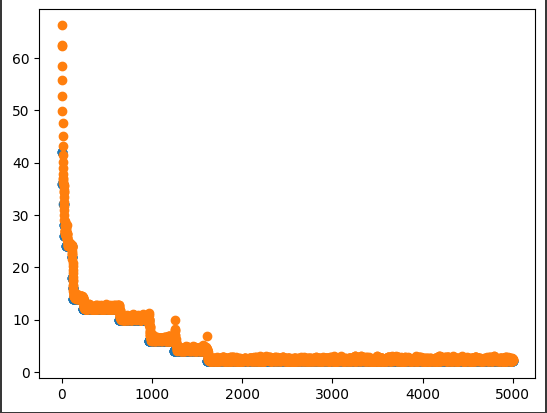


In [85]:
def select(pop,pop_fitness):
  candidates = pop_fitness[:]
  candidates.sort()

  parent1,parent2 = rd.sample(candidates[:4],2)


  i1 = pop_fitness.index(parent1)
  i2 = pop_fitness.index(parent2)

  return pop[i1],pop[i2]

**Recombinação:**

A etapa de recombinação é responsável por utilizar os pais escolhidos durante a etapa de seleção e criar dois filhos à partir deles.
Além da reprodução, a função também implementa uma possibilidade de mutação dos filhos. No processo de mutação, um dos dois filhos gerados é escolhido aleatoriamente, e dois de seus elementos são trocados entre si, introduzindo uma pequena variabilidade à pupulação.

A mutação contribui para diminuir algum viés causado pela escolha dos pais.

Tanto a operação de Crossover quanto a mutação estão sujeitas à certas probabilidades de ocorrer, determinadas previamente.

In [86]:
def recombine(parent1,parent2):
  chance = rd.randint(0,100)
  child = [parent1,parent2]
  if chance <= 100*crossover_rate:
    child = cut_crossfil(parent1,parent2)
  chance = rd.randint(0,100)
  if chance <= 100*mutation_rate:
    i,j = rd.sample(range(0, len(child[0])), 2)
    k = rd.randint(0,1)
    child[k][i],child[k][j] = child[k][j],child[k][i]

  return child[0], child[1]

**Avaliação:**

A etapa de avaliação seleciona tanto o melhor indivíduo (aquele que possui a quantidade de xeques mais próxima de zero), quando os piores(aqueles com a maior quantidade de xeque).

O processo de escolha dos piores indivíduos é análoga a de se escolher os melhores.



In [87]:

def evaluate(pop,pop_fitness):
  best = min(pop_fitness)

  candidates = pop_fitness[:]
  candidates.sort()
  worst1,worst2 = rd.sample(candidates[-4:],2)


  return best,pop[pop_fitness.index(best)],pop_fitness.index(worst1),pop_fitness.index(worst2)

A função principal do algorítimo, que implementa o loop, é simplesmente uma chamada das funções anteriores. Além de organizar as etapas, dentro do loop principal foram incluídas algumas funções mais isoladas como atualizar a populção com os filhos, a remoção dos piores indivíduos e recalcular o fitness.

In [88]:
from typing import Counter
def find_n_queens():
  avarage_fitness = []
  list_of_bests = []
  pop = init_population(MU, N)
  pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
  best = pop[0]
  counter = 0
  while counter < limit:
    parent1,parent2 = select(pop,pop_fitness)
    child1,child2 = recombine(parent1,parent2)
    best,best_pop,dead1,dead2 = evaluate(pop,pop_fitness)
    list_of_bests.append(best)
    counter += 1
    #Comentar condição de saída para calcular a média de diversas iterações
    # if best == 0:
    #    avarage_fitness.append(sum(pop_fitness)/len(pop_fitness))
    #    break


    if dead2 > dead1:
      dead2 = dead2 - 1
    del pop[dead1]
    del pop[dead2]

    pop.append(child1)
    pop.append(child2)
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
    avarage_fitness.append(sum(pop_fitness)/len(pop_fitness))

  #print(best_pop)
  # print(fitness_nq(best_pop))
  # print(pop_fitness)
  #print(best)
  # print(counter)
  return best_pop
  #return list_of_bests,avarage_fitness,counter


In [89]:
def squash(list):
  l = [0]*len(list[0])
  for i in range(0,len(list)):
    for j in range(0,len(list[i])):
      l[j] = l[j] + list[i][j]

  return [x//len(list) for x in l]

A seguir a função principal é chamada para resolver problemas com N=50, N=20 e N=8, com um limite de iterações de 10000. A média do fitness da populção ao longo do tempo é plotada, juntamente com o melhor indivíduo de cada geração.

In [90]:
# MU = 20
# N = 50
# limit = 10000

# crossover_rate = 1
# mutation_rate = 0.8

# best,average,iterations = find_n_queens()

# x = range(0,iterations)
# plt.scatter(x,best)
# plt.scatter(x,average)
# plt.show()

In [91]:
# MU = 20
# N = 20
# limit = 100000

# crossover_rate = 1
# mutation_rate = 0.8

# best,average,iterations = find_n_queens()

# x = range(0,iterations)
# plt.scatter(x,best)
# plt.scatter(x,average)
# plt.show()

In [92]:
# MU = 20
# N = 8
# limit = 100000

# crossover_rate = 1
# mutation_rate = 0.8

# best,average,iterations = find_n_queens()

# x = range(0,iterations)
# plt.scatter(x,best)
# plt.scatter(x,average)
# plt.show()

In [93]:
# MU = 20
# N = 50
# limit = 5000

# crossover_rate = 1
# mutation_rate = 0.8

# total_it = 100
# best = []
# average = []
# iterations = 0

# for i in range(0,total_it):
#     b,a,it = find_n_queens()
#     best.append(b)
#     average.append(a)
#     iterations = iterations + it

# x = range(0,int(iterations/total_it))
# print(len(best),len(best[0]))
# plt.scatter(x,squash(best))
# plt.scatter(x,squash(average))
# plt.show()

A figura a seguir mostra a média dos resultados para 100 iterações da solução para 50 rainhas. O algorítimo rodado foi interrompido após 5000 repetições do loop principal, idependentemente de ter encontrado a solução ou não.

O gráfico mostra que o algorítimo converte rapidamente para um mínimo local no início, porém depodois desacelera a conversão, podendo inclusive não sair do mínimo local encontrado. Devido ao gráfico representar a média dos resultados de diversas iterações, a curva de conversão aparenta mais suave do que em testes isolados. Como é mostrado nos gráficos dos testes acima, a curva de conversão tende a ficar a maior parte do tempo de de execução estagnada em um mínimo local, porém eventualmente encontrando a resposta ótima. Essa estagnação pode ser um sinal de falta de variabilidade aleatória no algorítimo e pressão seletiva muito restrita. Essas característcas podem fazer o algoŕitimo criar um viés para uma solução não-ótima, ficando estagnado nela.
A melhor maneira de se resolver isso seria adicionando mais variabilidade no algorítimo, contudo, uma seleção de indivíduos muito aleatória pode fazer com que o algorítimo não convirja.



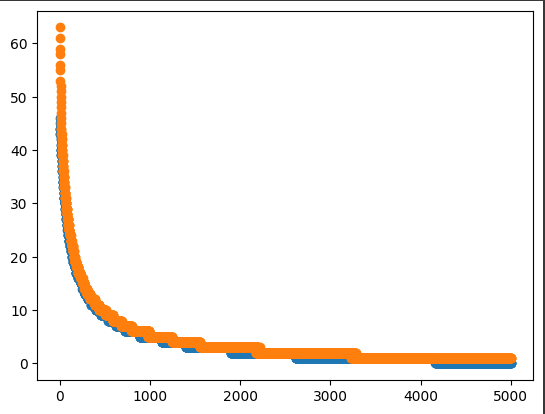

**Métodos para visualização das soluções**

Mapa de calor das posições de rainhas

In [94]:
def appendToBoard(board,solution):
  for i in range(0,len(solution)):
    board[solution[i]][i] = board[solution[i]][i] + 1


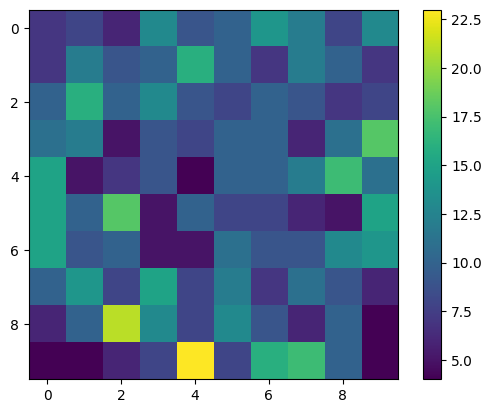

In [96]:
MU = 20
N = 10
limit = 5000

crossover_rate = 1
mutation_rate = 0.8

total_it = 100
best = np.zeros((N,N))


for i in range(0,total_it):
    b= find_n_queens()
    appendToBoard(best,b)

plt.imshow(best)
plt.colorbar()
plt.show()

# x = range(0,int(iterations/total_it))
# print(len(best),len(best[0]))
# plt.scatter(x,squash(best))
# plt.scatter(x,squash(average))
# plt.show()